# Setup

In [1]:
LOG_PLOT = False
NDAYS=50

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import os
from helper import *
from datetime import datetime
from ecdc import ECDC

## ECDC Data

In [3]:
ecdc = ECDC()
df = ecdc.df
print(ecdc.df.dateRep.max())
df.columns


2020-10-21 00:00:00


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

## DF Subsets

In [4]:
EU = df[df.continentExp=='Europe'].groupby('dateRep', as_index=False).agg({'cases': sum})
AMERICA = df[(df.continentExp=='America')]


<IPython.core.display.Javascript object>


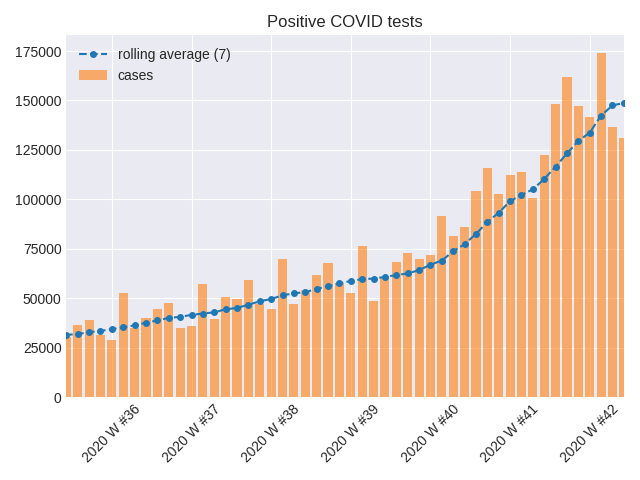

<AxesSubplot:title={'center':'Positive COVID tests'}>

In [5]:
ecdc.plot_selection(EU, ndays=NDAYS, roll_days=7)

# Overview

## Austria, USA, India, ...

<IPython.core.display.Javascript object>


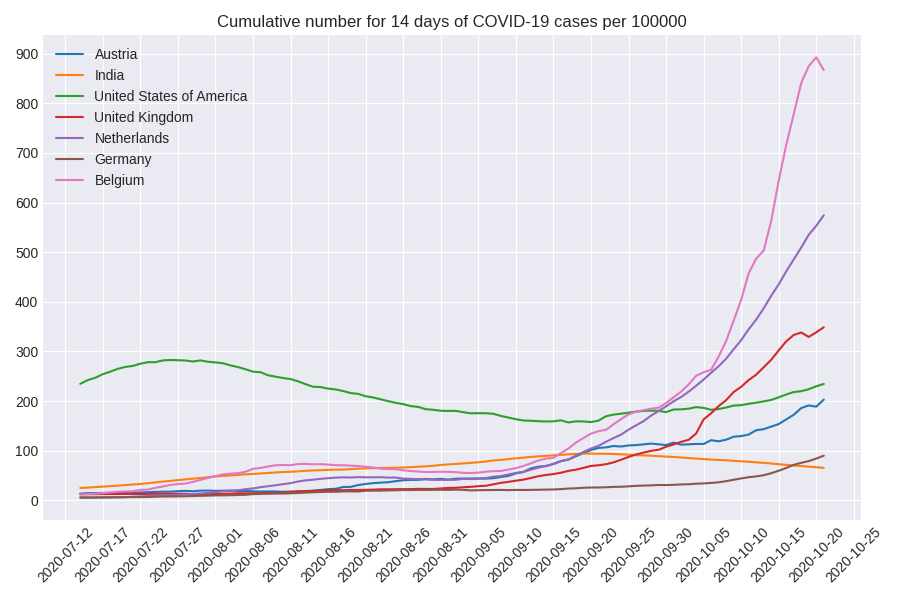

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
United_States_of_America  59512.857143  70256, 56611, 47843, 60160, 58549   
India                     58816.857143  62212, 61871, 55722, 46790, 54044   
United_Kingdom            18231.714286  15635, 16171, 16981, 18803, 21330   
Netherlands                7920.142857       7978, 8105, 8439, 7720, 8149   
Germany                    6596.714286       7830, 5587, 4325, 6868, 7595   
Belgium                    6275.857143        10906, 5612, 3045, 2329, 30   
Austria                    1521.714286       1691, 2040, 1062, 1054, 1803   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
United_States_of_America  78427  221066            5164  737.714286   
India                     97894  115914            5328  761.142857   
United_Kingdom            22961   43967             949  135.571429   
Netherlands                8439    6804             182   26.000000   
Germany                    7830    9875             198   28.285714   
Belgium                   12243   10489             205   29.285714   
Austria                    2040     927              48    6.857143   

                                                          \
                                       last_5_days   max   
countriesAndTerritories                                    
United_States_of_America   899, 690, 385, 459, 933  4928   
India                     837, 1033, 579, 587, 717  2003   
United_Kingdom               136, 150, 67, 80, 241  1224   
Netherlands                      16, 29, 23, 8, 45   234   
Germany                         33, 10, 12, 47, 39   315   
Belgium                          34, 21, 29, 40, 4   321   
Austria                              7, 6, 3, 9, 8    31   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         234.510566           
India                                                             65.424794           
United_Kingdom                                                   348.745794           
Netherlands                                                      574.378334           
Germany                                                           89.950262           
Belgium                                                          867.171535           
Austria                                                          202.951311           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  282.723242  
India                      94.173835  
United_Kingdom            348.745794  
Netherlands               574.378334  
Germany                    89.950262  
Belgium                   892.617785  
Austria                   202.951311

In [6]:
# countries = ['AT', 'IN', 'US', 'UK', 'DE', 'NL', 'FR',  'IT', 'ES','EL' ]
countries = ('AT', 'IN', 'US', 'UK', 'NL', 'DE', 'BE')
SELECTION =  df[df.geoId.isin(countries)]

ecdc.plot_comparison(countries, log=False, ndays=100)
ecdc.overview(SELECTION)

## Sweden and the world

<IPython.core.display.Javascript object>


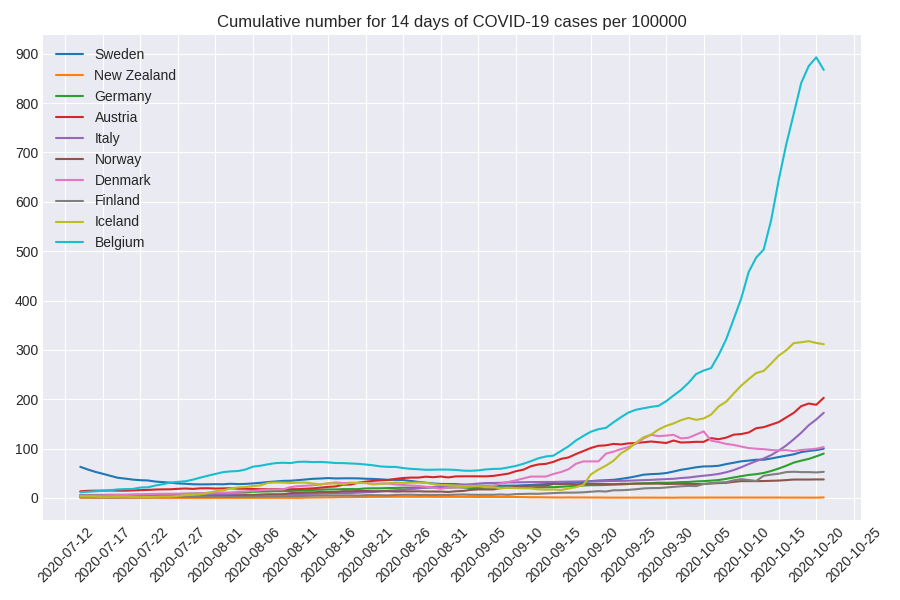

<AxesSubplot:title={'center':'Cumulative number for 14 days of COVID-19 cases per 100000'}>

In [7]:
countries = ('SE', 'NZ','DE','AT','IT','NO','DK','FI','IS','BE')
ecdc.plot_comparison(countries, log=False, ndays=100)


### World

In [8]:
ecdc.overview(df).head(5)

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
United_States_of_America  59512.857143  70256, 56611, 47843, 60160, 58549   
India                     58816.857143  62212, 61871, 55722, 46790, 54044   
France                    24896.142857  25086, 32427, 29837, 13243, 20468   
Brazil                    22903.714286  30914, 24062, 10982, 15383, 23227   
United_Kingdom            18231.714286  15635, 16171, 16981, 18803, 21330   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
United_States_of_America  78427  221066            5164  737.714286   
India                     97894  115914            5328  761.142857   
France                    32427   33885             952  136.000000   
Brazil                    69074  154837            3839  548.428571   
United_Kingdom            22961   43967             949  135.571429   

                                                          \
                                       last_5_days   max   
countriesAndTerritories                                    
United_States_of_America   899, 690, 385, 459, 933  4928   
India                     837, 1033, 579, 587, 717  2003   
France                       178, 89, 85, 146, 262  2004   
Brazil                     754, 461, 230, 271, 661  1595   
United_Kingdom               136, 150, 67, 80, 241  1224   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
United_States_of_America                                         234.510566           
India                                                             65.424794           
France                                                           441.679251           
Brazil                                                           144.427242           
United_Kingdom                                                   348.745794           

                                      
                                 max  
countriesAndTerritories               
United_States_of_America  282.723242  
India                      94.173835  
France                    441.679251  
Brazil                    304.320523  
United_Kingdom            348.745794

# Austria
Compare ECDC data with Gesundheitsminesterium Data

## Plots

<IPython.core.display.Javascript object>


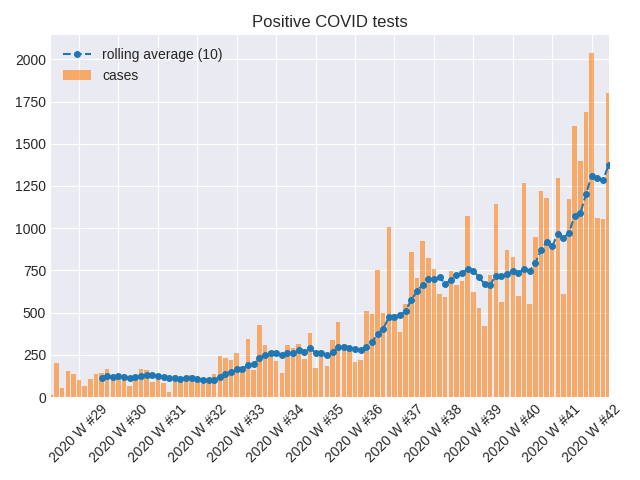

In [9]:
ecdc.plot_country('AT', log=LOG_PLOT, ndays=100, roll_days=10);

# India

<IPython.core.display.Javascript object>


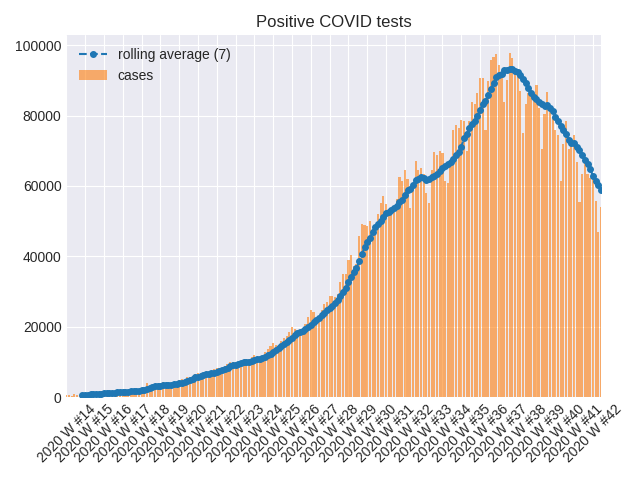

In [12]:
ecdc.plot_country('IN', log=LOG_PLOT,ndays=200, roll_days=7);

# USA

<IPython.core.display.Javascript object>


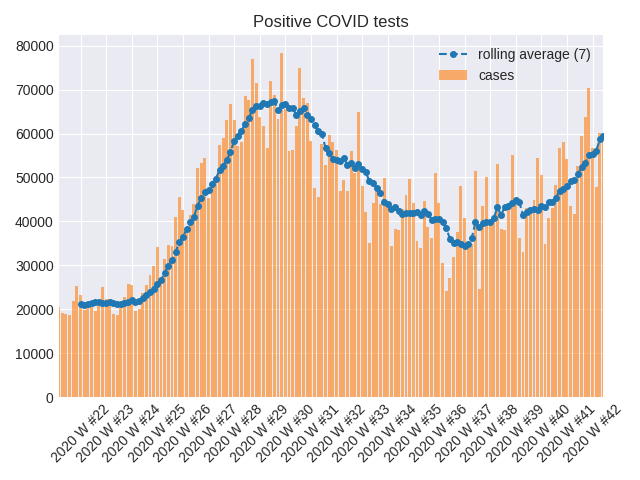

In [13]:
ecdc.plot_country('US', log=LOG_PLOT,ndays=150, roll_days=7);


# Germany

<IPython.core.display.Javascript object>


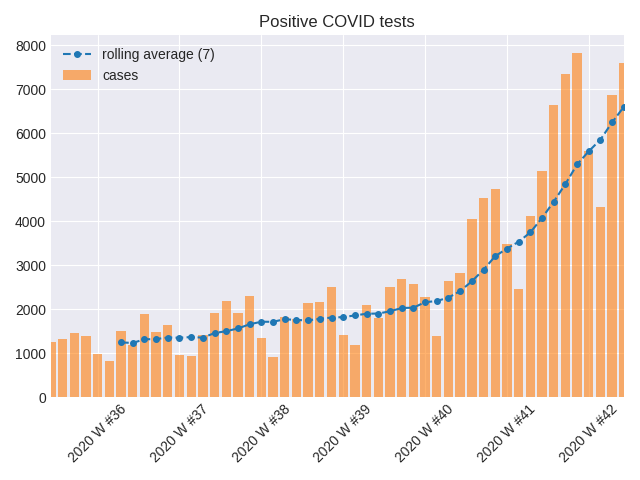

In [14]:
ecdc.plot_country('DE', log=LOG_PLOT,ndays=NDAYS, roll_days=7);

## UK

<IPython.core.display.Javascript object>


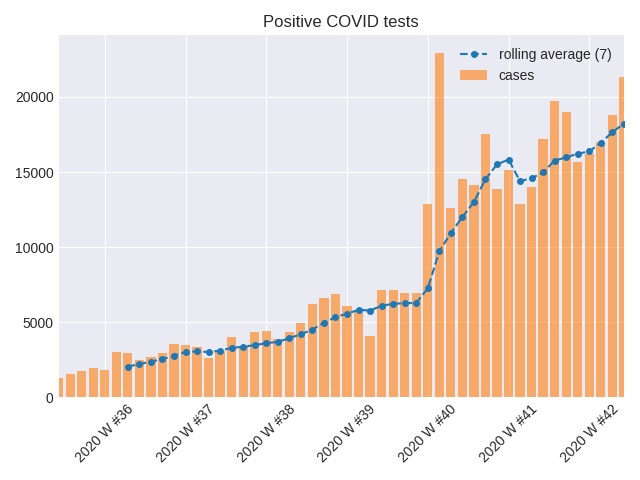

In [15]:
ecdc.plot_country('UK', log=LOG_PLOT,ndays=NDAYS,roll_days=7);

# Commit and Push

In [28]:
%cd Documents/code/covid19/
now = datetime.now()
commit_message = "Last run on " + now.strftime('%Y-%m-%d %H:%M')
commit_message
! echo $commit_message > commit_message.txt
! git add .
! git commit -F commit_message.txt
! git push


[Errno 2] No such file or directory: 'Documents/code/covid19/'
/home/gythaogg/Documents/code/covid19/notebooks
[feature/angular 6a3cbde] Last run on 2020-10-20 08:38
 3 files changed, 246 insertions(+), 220 deletions(-)
Enumerating objects: 13, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 16 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 331.82 KiB | 5.92 MiB/s, done.
Total 7 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.
To github.com:gythaogg/covid19.git
   62eab47..6a3cbde  feature/angular -> feature/angular


In [41]:
! git push --set-upstream origin feature/angular


Branch 'feature/angular' set up to track remote branch 'feature/angular' from 'origin'.
Everything up-to-date
